# 2. Labos uživo -Numerička matematika

Ime i prezime: Mihael Miličević

1 . Zadani su podaci 
$$ \begin{array}{c||c|c|c|c|c|c|}
x_i & 0.15&2.3 &3.15 & 4.85 & 6.25 & 7.95\\ \hline
y_i &4.79867& 4.49013 & 4.2243 & 3.47313 & 2.66674 & 1.51909\end{array}$$
koji predstavljaju vrijednost funkcije $f(x)=4.8 \cos \frac{\pi x}{20}$.  Odredite Lagrangeov interpolacijski polinom koristeći funkciju [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html), te grafički prikažite polinom i funkciju f(x), na istom grafu. (za pomoc mozete pogledati i prvu Jupyter bilježnicu vezanu za interpolaciju u predavanjima)

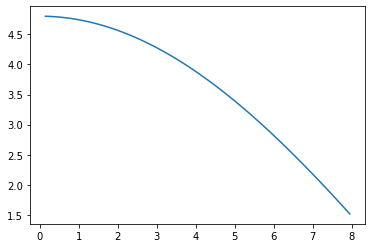

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
xData = np.array([0.15,2.3,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
poly = interpolate.lagrange(xData,yData)
xp = np.linspace(0.15, 7.95, 100)
yp = poly(xp)
plt.plot(xp, yp)
plt.show()


  2 . Za podatke
$$ \begin{array}{c||c|c|c|c|c|c|}
x_i & 0.1&0.2 &0.3 & 0.4 & 0.5 & 0.6& 0.7 & 0.8 & 0.9 & 1.0\\ \hline
y_i &1& 5 & 2 & 7 & 1 & 2 & 2 & 7 & 9 & 2\end{array}$$
formiraj vandermondeovu matricu te izračunaj koeficijente interpolacijskog polinoma, kao što je to napravljeno u početnoj Jupyter bilježnici s predavanja (1. bilježnica vezana za interpolaciju).

In [36]:
import numpy as np

x = np.array([0.0, 0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0.0,1,5,2,7,1,2, 2,7, 9, 2])

V = np.vander(x, len(x), increasing=True)
a = np.linalg.solve(V, y)

print("Koeficijenti:")
print(a)

Koeficijenti:
[ 0.00000000e+00 -4.04889286e+03  1.07393006e+05 -1.12694901e+06
  6.31541052e+06 -2.11704688e+07  4.45422454e+07 -5.93467262e+07
  4.86202050e+07 -2.23462302e+07  4.40917108e+06]


3 . Za podatke iz 2. zadatka upotrijebite funkciju polyfit [link](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), te aproksimirajte podatke, polinomom stupnja 1,2, 10. Ovo je aproksimacija u smislu najmanjih kvadrata! Dobivamo li za $n=10$ intepolacijski polinom? (vidi predavanja. skripta: Metoda najmanjih kvadrata)

In [37]:
import numpy as np

x = np.array([0.0, 0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0.0,1,5,2,7,1,2, 2,7, 9, 2])

print(f'koeficijenti polinoma stupnja {1} -> {np.polyfit(x,y,1)}')
print(f'koeficijenti polinoma stupnja {2} -> {np.polyfit(x,y,2)}')
print(f'koeficijenti polinoma stupnja {10} -> {np.polyfit(x,y,10)}')

print("Polinom stupnja 10 jest interpolacijski polinom jer imamo upravo 10+1 zadanih točaka.")

koeficijenti polinoma stupnja 1 -> [3.90909091 1.5       ]
koeficijenti polinoma stupnja 2 -> [-4.31235431  8.22144522  0.85314685]
koeficijenti polinoma stupnja 10 -> [ 4.40917108e+06 -2.23462302e+07  4.86202050e+07 -5.93467262e+07
  4.45422454e+07 -2.11704688e+07  6.31541052e+06 -1.12694901e+06
  1.07393006e+05 -4.04889286e+03 -9.96855342e-09]
Polinom stupnja 10 jest interpolacijski polinom jer imamo upravo 10+1 zadanih točaka.



4 .  Prema dostupnim informacijama na raspolaganju su nam sljedeći podaci o broju stanovnika u Hrvatskoj
$$\begin{array}{|c|c|} t_i& p_i \\ \hline \hline \\
1964. & 4259680\\
1969. & 4387000\\
1974. & 4497000\\
1979. & 4571000\\
1984. & 4680000\\
1989. & 4767000\\
1994. & 4650000\\
1999. & 4554000\\
2004. & 4439000\\
2009. & 4432001
\end{array}$$ 

Također poznata je informacija da je 2011. godine bilo $4456096$ stanovnika. Zadane podatke interpolirajte potom koristeći kubni splajn [link1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline) ili [link2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) kao što je to napravljeno u Jupyter bilježnici s predavanja. Nacrtajte graf toga splajna, te procijenite broj stanovnika u 2011. Izračunajte apsolutnu pogrešku. (Za pomoć vidi Jupyter bilježnicu s predavanja o splajnovima, ili sam početak interpolacije)

Procjena broja stanovnika za 2011. godinu je 4504027, a apsolutna pogreška je 47931.


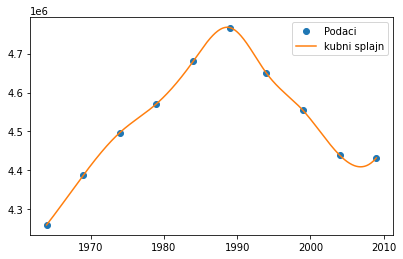

In [38]:
from scipy import interpolate

x=np.linspace(1964.0,2009.0,10)
y=np.array([4259680.0, 4387000.0, 4497000.0, 4571000.0, 4680000.0, 4767000.0, 4650000.0, 4554000.0, 4439000.0, 4432001.0])

cs = interpolate.CubicSpline(x,y)

x2 = np.linspace(1964, 2009, 1000)

fig = plt.subplots(figsize=(6.5, 4))   
plt.plot(x, y, 'o', label='Podaci')
plt.plot(x2, cs(x2), label='kubni splajn')
plt.legend(loc='upper right')

print(f'Procjena broja stanovnika za 2011. godinu je {int(cs(2011))}, a apsolutna pogreška je {int(abs(cs(2011) - 4456096))}.')

5 .   Zadane podatke iz 4. zadatka  interpolirajte najprije koristeći polinomijalnu interpolaciju tako da iskoristite funkcije *lagrange* i *polyfit* koje ste koristili u 1. i 4. zadatku. Prikažite rezultate na zasebnim grafovima. Prolaze li podaci interpolacijskim točkama? (Za pomoc vidi kako je upotijebljena polyfit funkcija u predavanjima (skripta: metoda najmanjih kvadrata))

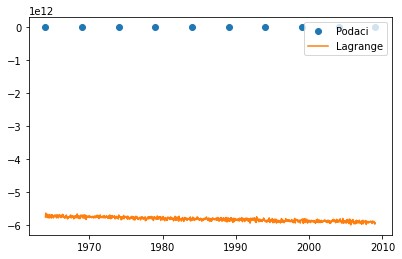

TypeError: 'numpy.ndarray' object is not callable

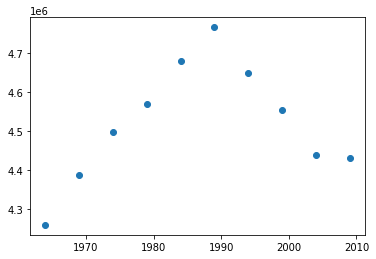

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x=np.linspace(1964.0,2009.0,10)
y=np.array([4259680.0, 4387000.0, 4497000.0, 4571000.0, 4680000.0, 4767000.0, 4650000.0, 4554000.0, 4439000.0, 4432001.0])

l = interpolate.lagrange(x,y)
x2 = np.linspace(1964, 2009, 1000)

fig = plt.subplots(figsize=(6.5, 4))   
plt.plot(x, y, 'o', label='Podaci')
plt.plot(x2, l(x2), label='Lagrange')
plt.legend(loc='upper right')
plt.show()

p = np.polyfit(x, y, 2)

plt.plot(x, y, 'o', label='Podaci')
plt.plot(x2, p(x2), label='polyfit')
plt.legend(loc='upper right')
plt.show()

6 .  Sada za podatke iskoristite funkcije s predavanja te interpolirajte dane podatke u 4. zadatku Newtonovim interpolacijskim polinomom. implementacija s predavanja je dana u nastavku. (Za pomoc vidi Jupyter biljeznicu o Newtonovom interpolacijskom polinomu)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


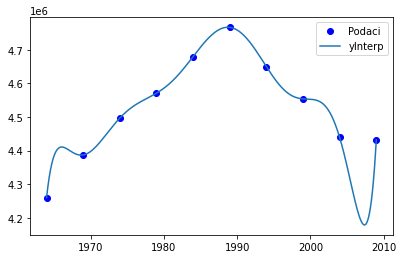

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def evalPoly(c,x,xu):
    n = len(x) - 1 # Degree of polynomial
    p = c[n]
    for k in range(1,n+1):
        p = c[n-k] + (xu -x[n-k])*p
    return p

def polycoef(x,y):
    n = len(x) # Number of data points
    c = y.copy()
    for j in range(1,n):
        c[j:n] = (c[j:n] - c[j-1])/(x[j:n] - x[j-1])
    return c

def NewtonInterp(x,y,xu): # ovdje kao ulaz idu podaci x i y a u točka xu se polinom izvrednjava
    c = polycoef(x,y)
    yu = evalPoly(c,x,xu)
    #print(yu)
    return yu

x=np.linspace(1964.0,2009.0,10)
y=np.array([4259680.0, 4387000.0, 4497000.0, 4571000.0, 4680000.0, 4767000.0, 4650000.0, 4554000.0, 4439000.0, 4432001.0])

xp = np.linspace(1964, 2009, 1000)
yu = NewtonInterp(x,y,xp)

fig, ax = plt.subplots(figsize=(6.5, 4))   
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(xp, yu,label="yInterp")
ax.legend(loc='upper right')
plt.savefig("interpolacijaNewton.eps") 

7 .  Upotrijebite trapezno pravilo s predavanja ili ono iz vec implementiranih funkcija u bibliotekama da izračunate vrijednost integrala $\int_0^{\sqrt{\pi}}2x^2\cos(x^2)\, dx$. Broj točaka uzmite po vlastitom izboru. ( za pomoc vidi Jupyter bilježnicu Numerička integracija)

In [ ]:
# Ovdje sada ide kod i idu grafovi , te dobiveni rezultati relativne pogreške

from math import sqrt, pi, cos
import numpy as np

def trapezna(f,a,b,N=1000):
    x = np.linspace(a,b,N+1) 
    y = f(x)
    y_right = y[0:N] # lijevi rub intervala
    y_left = y[1:N+1] # desni rub intervala
    h = (b - a)/N
    Tn = np.sum(h*(y_right + y_left)/2)
    return Tn

a = 0
b = sqrt(pi)
f = lambda x : 2 * x * x * cos(x * x)
vf = np.vectorize(f)

print(trapezna(vf, a, b))

-0.8948333255989727


8 . Upotrijebite Rombergov algoritam da izračunate $\int_0^{\sqrt{\pi}}2x^2\cos(x^2)\, dx$ (za pomoc vidi Jupyter bilježnicu Numerička integracija)

In [ ]:
from scipy import integrate
from numpy import cos, pi 

print(integrate.romberg(lambda x : 2 * x * x * cos(x * x), 0, sqrt(pi), show=True))

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f46c26379d0> from [0, 1.7724538509055159]

 Steps  StepSize   Results
     1  1.772454 -5.568328 
     2  0.886227 -1.799813 -0.543642 
     4  0.443113 -1.034769 -0.779755 -0.795496 
     8  0.221557 -0.925214 -0.888695 -0.895958 -0.897553 
    16  0.110778 -0.902166 -0.894484 -0.894870 -0.894852 -0.894842 
    32  0.055389 -0.896649 -0.894810 -0.894832 -0.894831 -0.894831 -0.894831 
    64  0.027695 -0.895285 -0.894830 -0.894831 -0.894831 -0.894831 -0.894831 -0.894831 
   128  0.013847 -0.894945 -0.894831 -0.894831 -0.894831 -0.894831 -0.894831 -0.894831 -0.894831 

The final result is -0.894831469484154 after 129 function evaluations.
-0.894831469484154


9 . Prouči funkciju [link](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) ili [link](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq) , upotrijebite neku od ovih funkcija na matricu $A$ i $y$ po izboru da riješite preodređeni sustav $Ax=y$. (smijete preuzeti i neki primjer koji smo radili na vježbama)

In [ ]:
import numpy as np

A = np.array([[3, 4], [4, 10]])
y = np.array([6, 11])

print(np.linalg.lstsq(A, y, rcond=None)[0])

[1.14285714 0.64285714]


10 .  Odredi SVD dekompoziciju matrice $A$ odabrane po vlastitom izboru. (za pomoc vidi [link](https://nbviewer.org/github/anazga/FER3-nummat/blob/main/17.predavanje.ipynb)), potom ispišite singularne vrijednosti koristeći funkciju [link 2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svdvals.html). Nakon toga ispišite svojstvene vrijednosti matrice $A^TA$ koristeći funkciju [link 3](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.linalg.eigvalsh.html#scipy.linalg.eigvalsh)

In [ ]:
import numpy as np
import scipy as sc

A = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])

print("SVD dekompozicija:")
print(np.linalg.svd(A))
print("\n")

print("Singularne vrijednosti:")
print(sc.linalg.svdvals(A))
print("\n")

At = np.transpose(A)
B = np.matmul(At, A)

print("Svojstvene vrijednosti matrice A^t * A")
print(sc.linalg.eigvalsh(B))

SVD dekompozicija:
(array([[-0.14087668, -0.82471435,  0.5377697 , -0.1039411 ],
       [-0.34394629, -0.42626394, -0.63955314,  0.539418  ],
       [-0.54701591, -0.02781353, -0.33420281, -0.7670127 ],
       [-0.75008553,  0.37063688,  0.43598625,  0.3315358 ]]), array([2.54624074e+01, 1.29066168e+00, 2.31173375e-15]), array([[-0.50453315, -0.5745157 , -0.64449826],
       [ 0.76077568,  0.05714052, -0.64649464],
       [-0.40824829,  0.81649658, -0.40824829]]))


Singularne vrijednosti:
[2.54624074e+01 1.29066168e+00 2.31173375e-15]


Svojstvene vrijednosti matrice A^t * A
[-6.66604195e-14  1.66580756e+00  6.48334192e+02]
